<a href="https://colab.research.google.com/github/amandabockmann/analise-desempenho-escolar/blob/c%C3%B3digo/Desenvolvimento_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install -U ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from IPython.display import display

In [ ]:
student_data = fetch_ucirepo(id=320)

X = student_data.data.features
y = student_data.data.targets

df = pd.concat([X, y], axis=1)

In [ ]:
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")


tipos_dados = df.dtypes.sort_values()
display(tipos_dados)


valores_ausentes = df.isnull().sum()
ausentes_encontrados = valores_ausentes[valores_ausentes > 0]
if not ausentes_encontrados.empty:
    print("\n Colunas com valores ausentes:\n")
    print(ausentes_encontrados)
else:
    print(" Nenhum valor ausente encontrado no DataFrame.")

Número de linhas: 649
Número de colunas: 33


,0
G3,int64
G2,int64
failures,int64
studytime,int64
traveltime,int64
famrel,int64
freetime,int64
Dalc,int64
goout,int64
Medu,int64


 Nenhum valor ausente encontrado no DataFrame.


In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Média das notas

In [ ]:
df['mean_grades'] = df[['G1'] + ['G2'] + ['G3']].mean(axis=1)

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,mean_grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,7.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,10.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,12.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,14.000000
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,12.333333


In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,mean_grades
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,11.625064
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,2.833360
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.333333
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,11.666667
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,18.666667


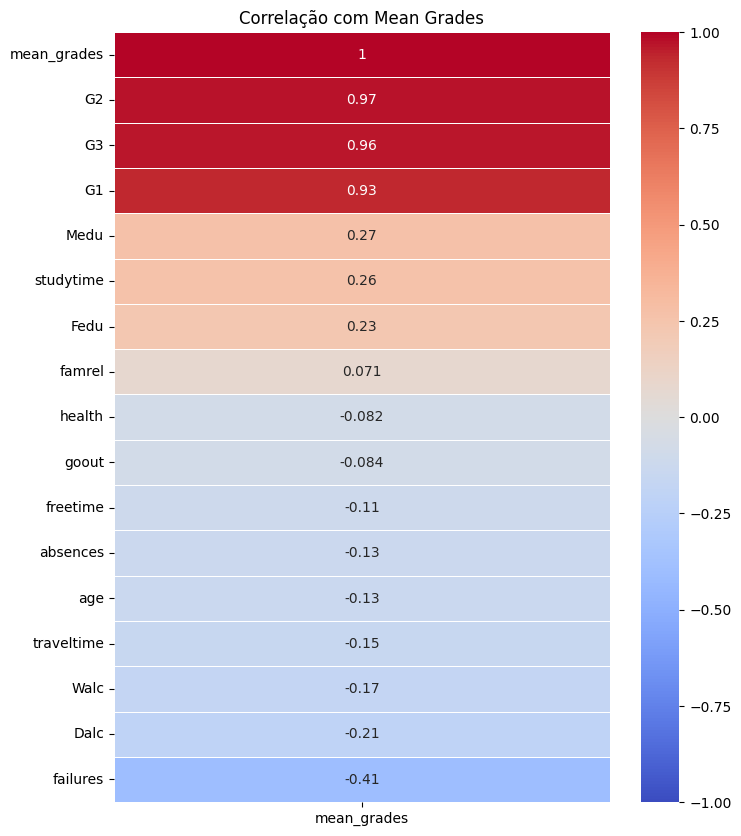

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
corr_with_mean = correlation_matrix[['mean_grades']].sort_values(by='mean_grades', ascending=False)
plt.figure(figsize=(8, 10))
sns.heatmap(corr_with_mean, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)

plt.title('Correlação com Mean Grades')
plt.show()

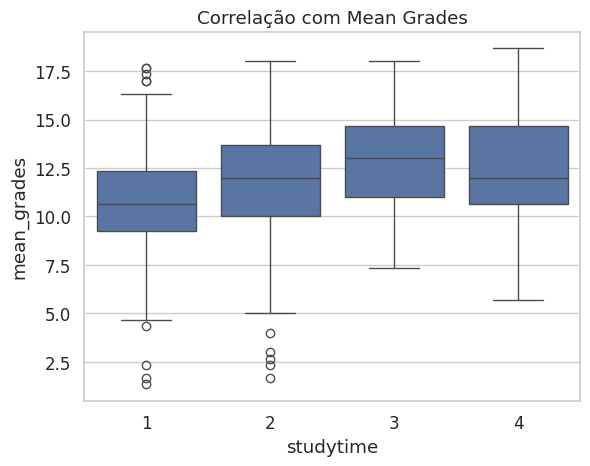

In [ ]:
sns.boxplot(x='studytime', y='mean_grades', data=df)
plt.title('Correlação com Mean Grades')
plt.show()

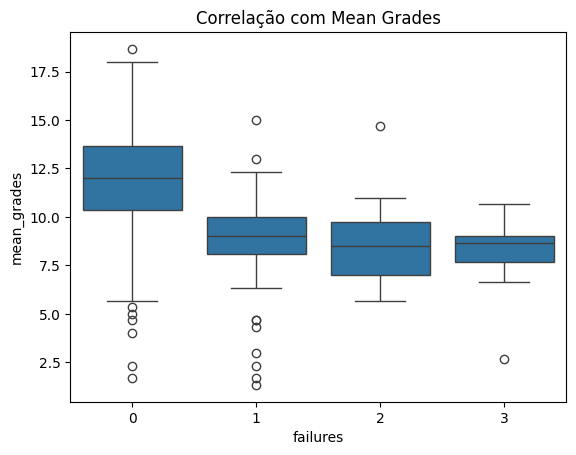

In [ ]:
sns.boxplot(x='failures', y='mean_grades', data=df_short)
plt.title('Correlação com Mean Grades')
plt.show()

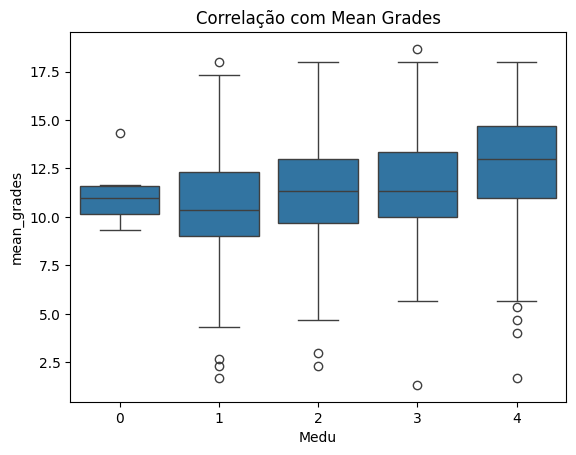

In [ ]:
sns.boxplot(x='Medu', y='mean_grades', data=df_short)
plt.title('Correlação com Mean Grades')
plt.show()

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['mean_grades', 'G2', 'G1', 'G3'])

In [ ]:
for col in num_cols:
    print(f"\n{col} - Médias de mean_grades por variáveis numéricas:")
    print(df.groupby(col)['mean_grades'].mean().sort_values()) # sugiro remover o sort_values


age - Médias de mean_grades por variáveis numéricas:
age
22     6.666667
19     9.291667
21    10.333333
20    11.444444
18    11.473810
16    11.785311
17    11.878957
15    11.898810
Name: mean_grades, dtype: float64

Medu - Médias de mean_grades por variáveis numéricas:
Medu
1    10.573427
0    11.222222
2    11.383513
3    11.601918
4    12.773333
Name: mean_grades, dtype: float64

Fedu - Médias de mean_grades por variáveis numéricas:
Fedu
1    10.718391
2    11.521531
0    11.714286
3    12.035623
4    12.601562
Name: mean_grades, dtype: float64

traveltime - Médias de mean_grades por variáveis numéricas:
traveltime
4    10.375000
3    10.876543
2    11.311424
1    11.972678
Name: mean_grades, dtype: float64

studytime - Médias de mean_grades por variáveis numéricas:
studytime
1    10.683962
2    11.763934
3    12.814433
4    12.819048
Name: mean_grades, dtype: float64

failures - Médias de mean_grades por variáveis numéricas:
failures
3     8.166667
2     8.645833
1     8.747619

# Category Columns

In [ ]:
cat_cols = df.select_dtypes(exclude='number').columns
for col in cat_cols:
    print(f"\n{col} - Médias de mean_grades por categoria:")
    print(df.groupby(col)['mean_grades'].mean().sort_values())


school - Médias de mean_grades por categoria:
school
MS    10.482301
GP    12.235619
Name: mean_grades, dtype: float64

sex - Médias de mean_grades por categoria:
sex
M    11.223058
F    11.904265
Name: mean_grades, dtype: float64

address - Médias de mean_grades por categoria:
address
R    10.906937
U    11.938053
Name: mean_grades, dtype: float64

famsize - Médias de mean_grades por categoria:
famsize
GT3    11.541211
LE3    11.824653
Name: mean_grades, dtype: float64

Pstatus - Médias de mean_grades por categoria:
Pstatus
A    11.541667
T    11.636790
Name: mean_grades, dtype: float64

Mjob - Médias de mean_grades por categoria:
Mjob
at_home     10.735802
other       11.457364
services    11.825980
health      12.701389
teacher     12.796296
Name: mean_grades, dtype: float64

Fjob - Médias de mean_grades por categoria:
Fjob
at_home     10.873016
services    11.430939
other       11.598547
health      12.289855
teacher     13.324074
Name: mean_grades, dtype: float64

reason - Médias

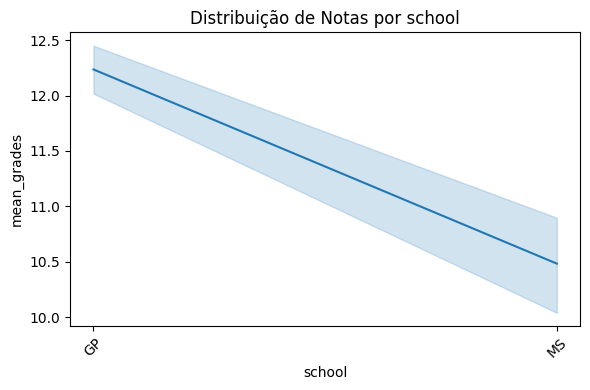

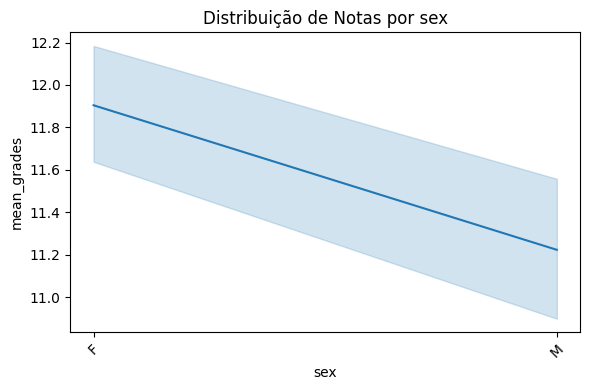

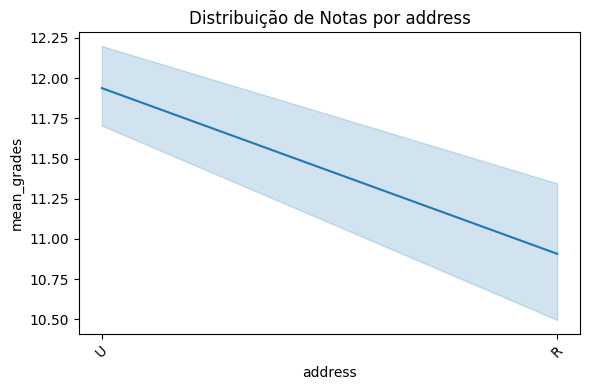

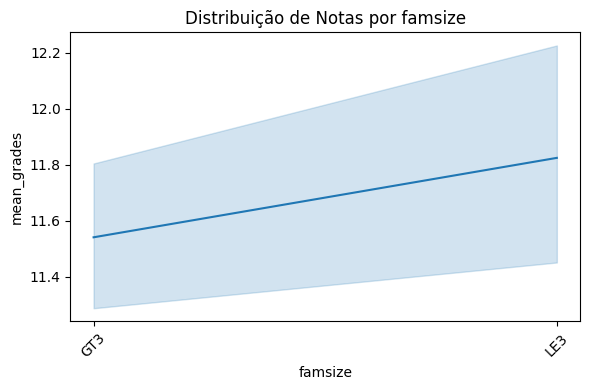

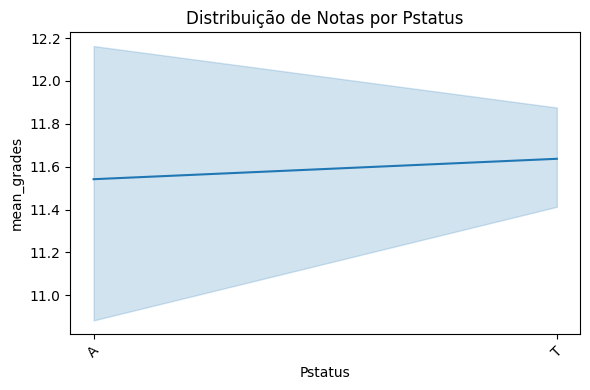

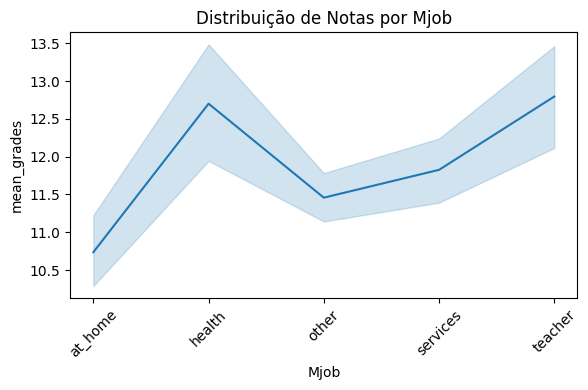

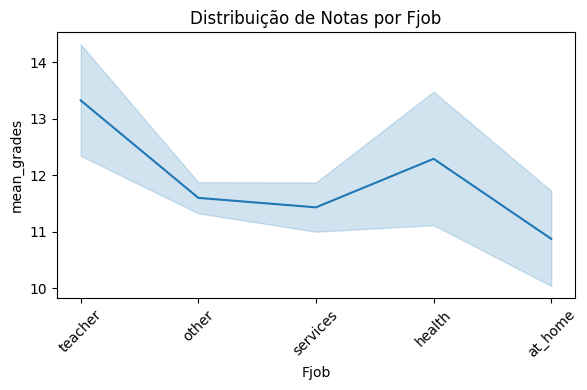

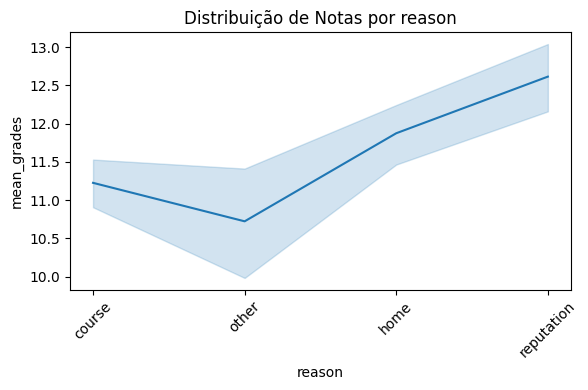

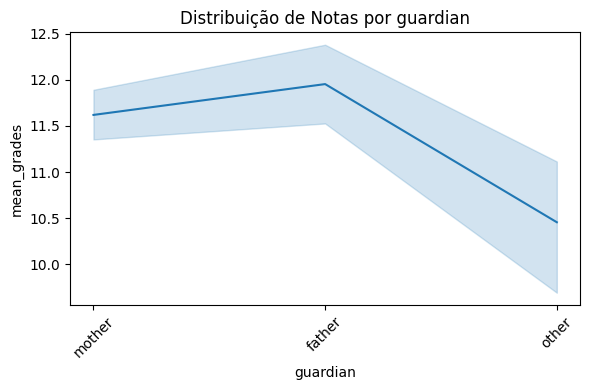

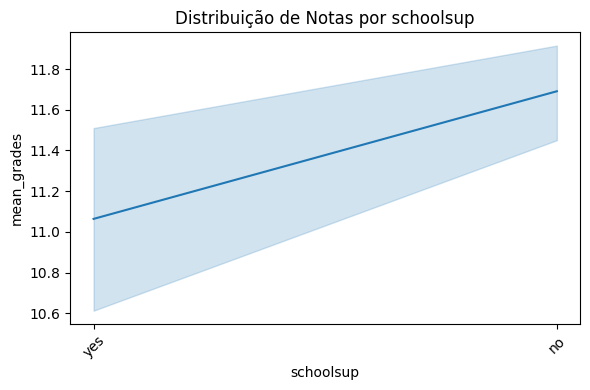

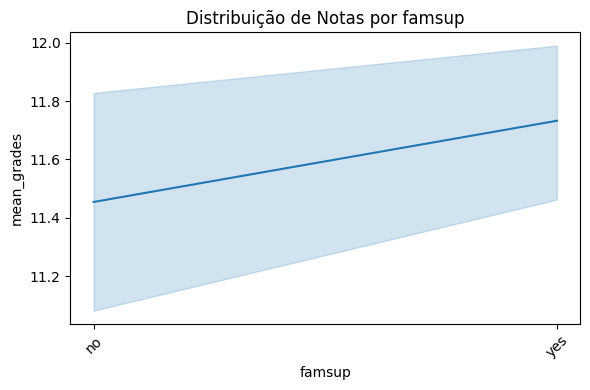

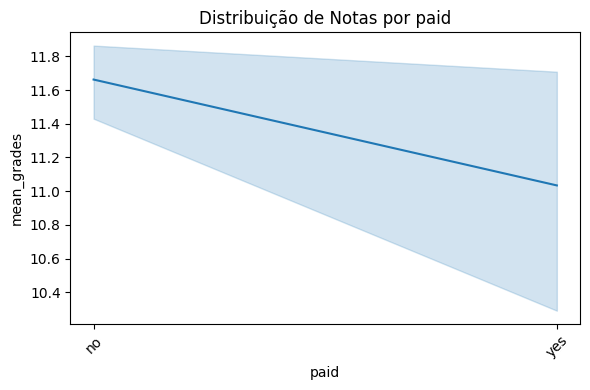

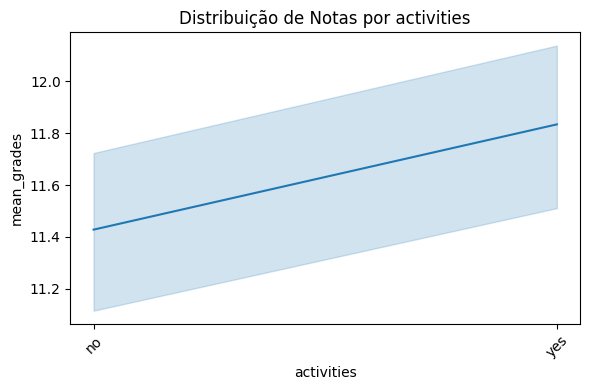

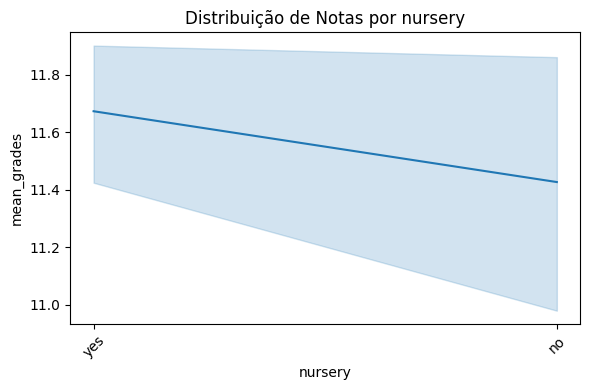

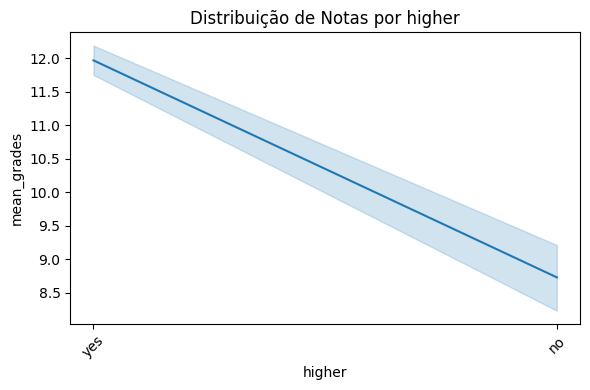

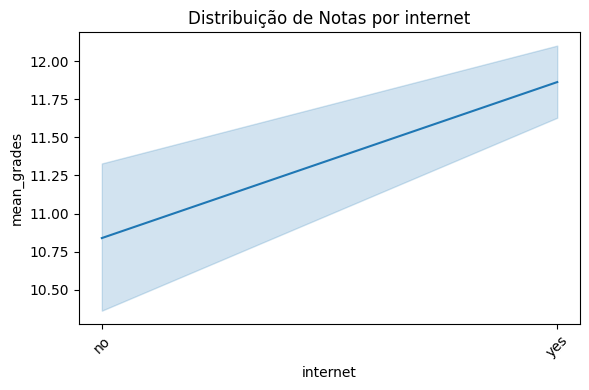

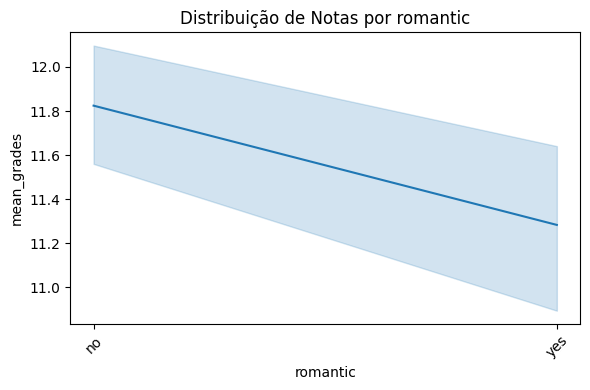

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.lineplot(x=col, y='mean_grades', data=df)
    plt.title(f'Distribuição de Notas por {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-23-2541245981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=df)


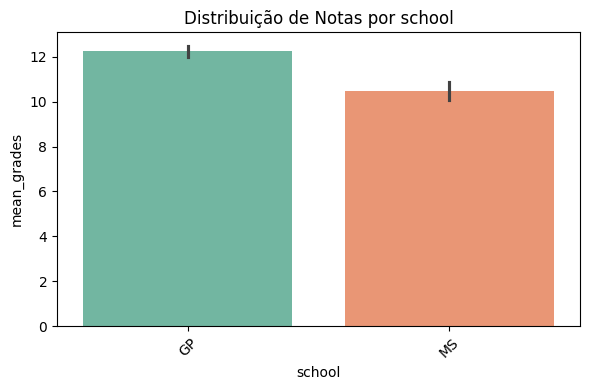

/tmp/ipython-input-23-2541245981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=df)


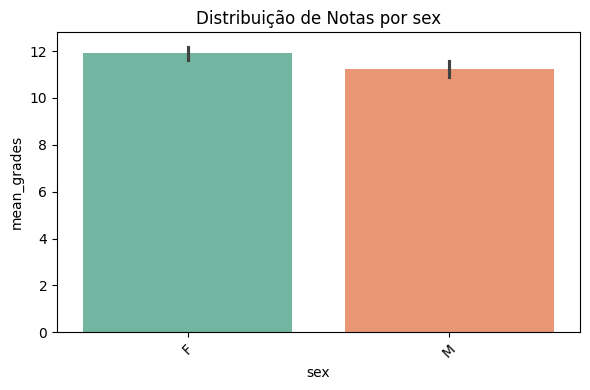

/tmp/ipython-input-23-2541245981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=df)


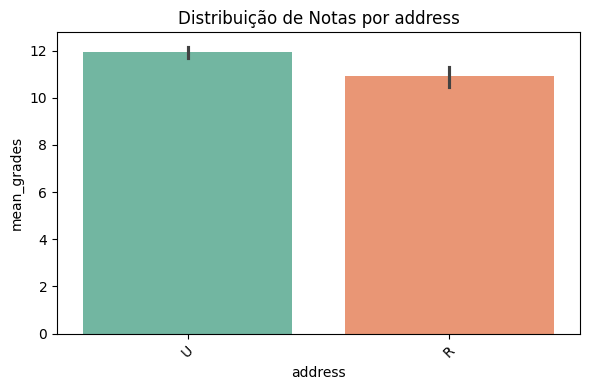

/tmp/ipython-input-23-2541245981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=df)


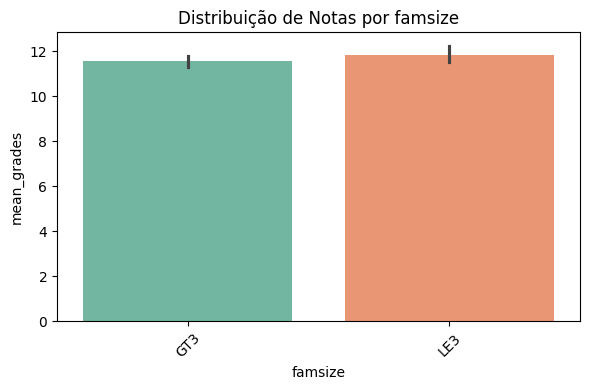

/tmp/ipython-input-23-2541245981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=df)


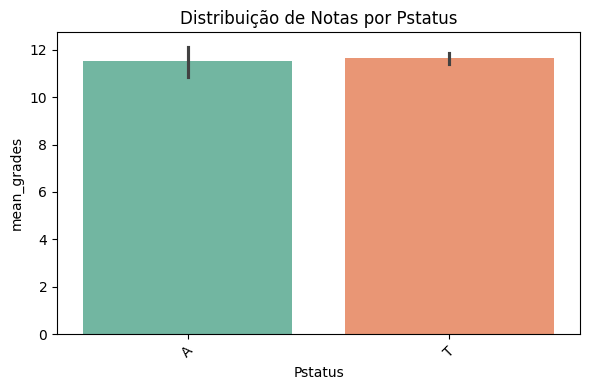

/tmp/ipython-input-23-2541245981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=df)


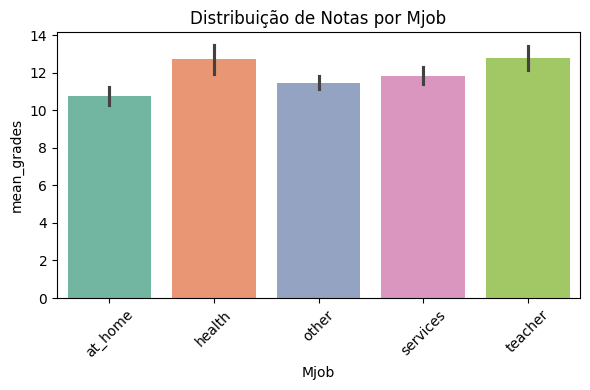

/tmp/ipython-input-23-2541245981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=df)


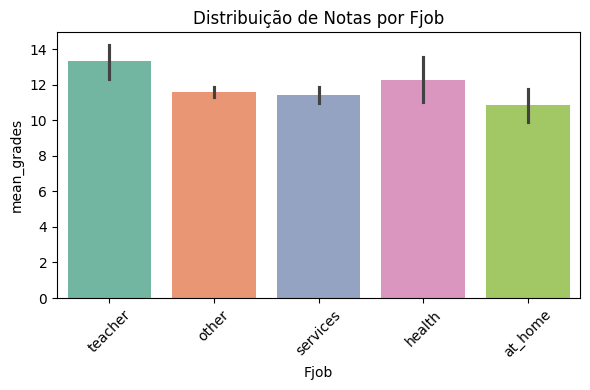

/tmp/ipython-input-23-2541245981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=df)


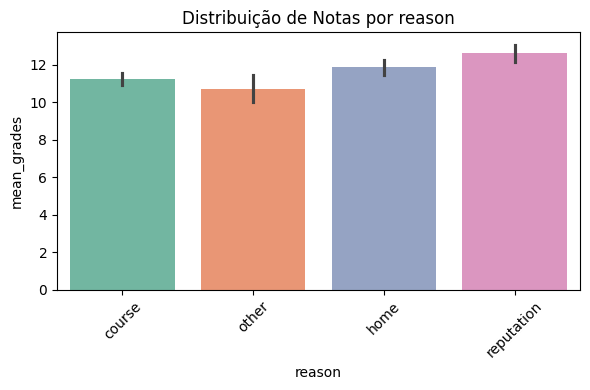

/tmp/ipython-input-23-2541245981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=df)


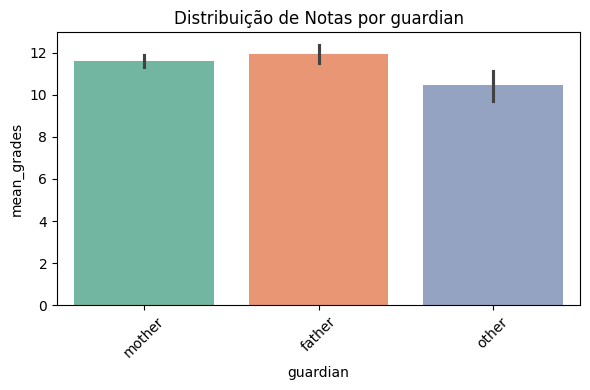

/tmp/ipython-input-23-2541245981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=df)


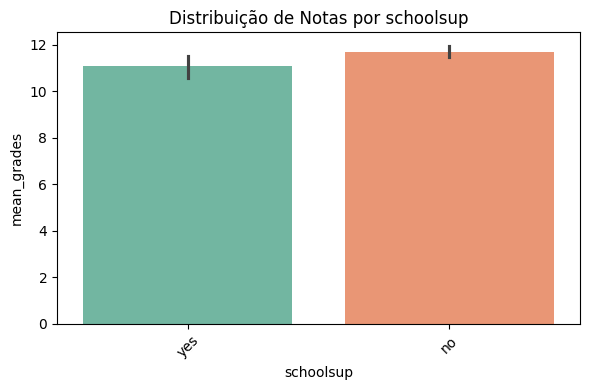

/tmp/ipython-input-23-2541245981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=df)


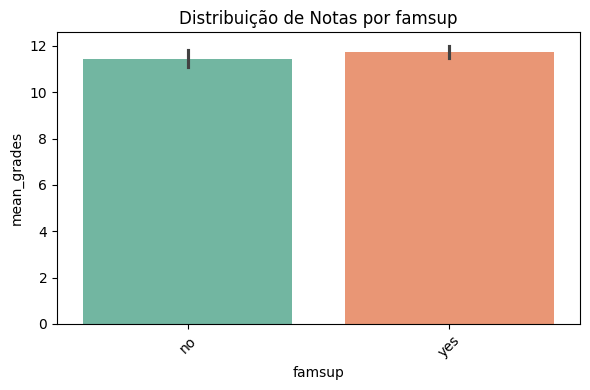

/tmp/ipython-input-23-2541245981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=df)


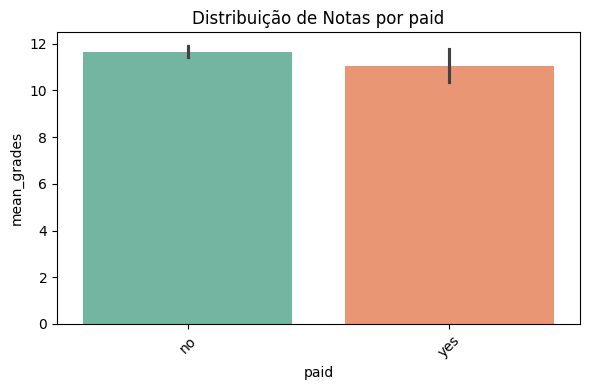

/tmp/ipython-input-23-2541245981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=df)


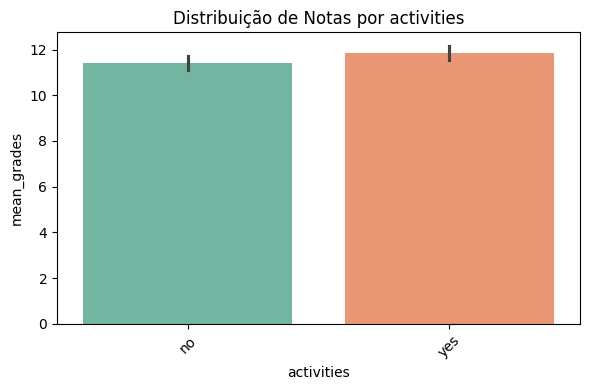

/tmp/ipython-input-23-2541245981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=df)


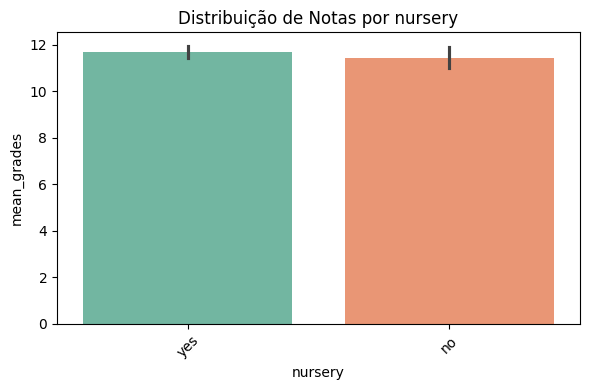

/tmp/ipython-input-23-2541245981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=df)


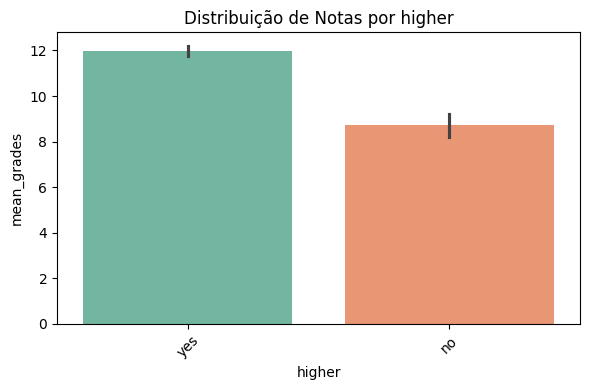

/tmp/ipython-input-23-2541245981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=df)


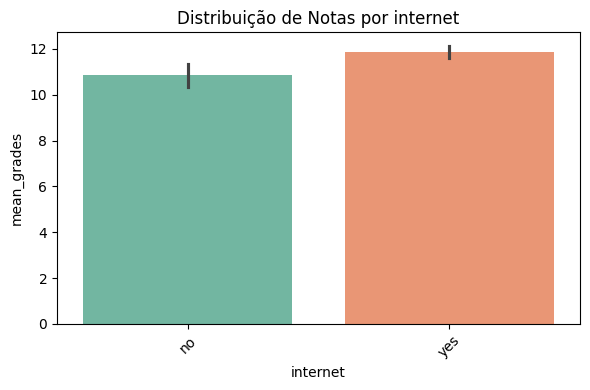

/tmp/ipython-input-23-2541245981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=df)


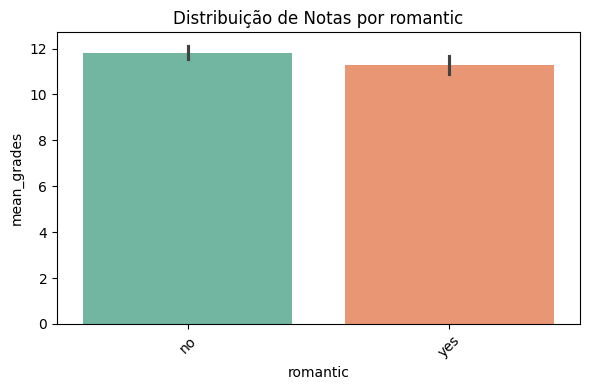

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=df)
    plt.title(f'Distribuição de Notas por {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

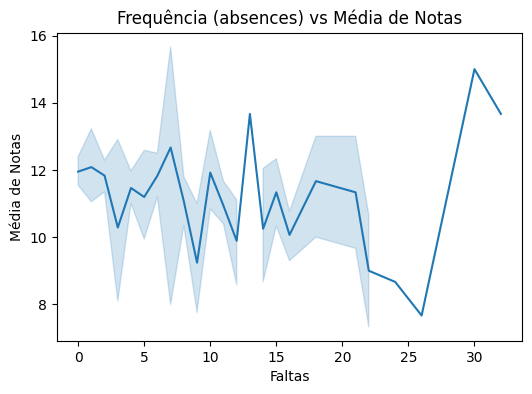

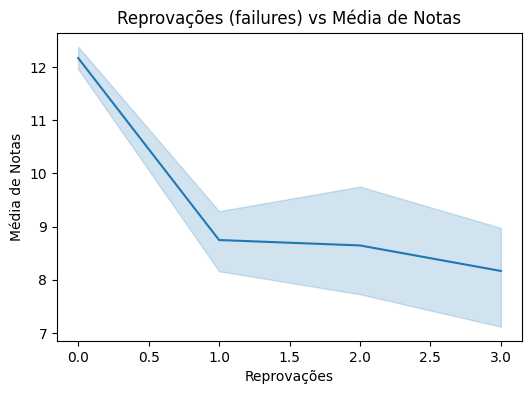

In [ ]:
# Absences vs mean_grades
plt.figure(figsize=(6, 4))
sns.lineplot(x='absences', y='mean_grades', data=df)
plt.title('Frequência (absences) vs Média de Notas')
plt.xlabel('Faltas')
plt.ylabel('Média de Notas')
plt.show()

# Failures vs mean_grades
plt.figure(figsize=(6, 4))
sns.lineplot(x='failures', y='mean_grades', data=df_short)
plt.title('Reprovações (failures) vs Média de Notas')
plt.xlabel('Reprovações')
plt.ylabel('Média de Notas')
plt.show()

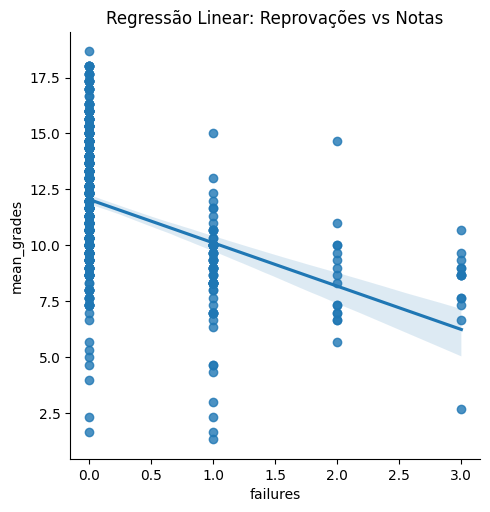

In [ ]:
sns.lmplot(x='failures', y='mean_grades', data=df)
plt.title('Regressão Linear: Reprovações vs Notas')
plt.show()

# Exploração Categóricas e Numéricas

In [ ]:
# Alunos que possuem interesse por graduação e se possuem pais com graduação

In [ ]:
df['higher'].value_counts()


,count
higher,
yes,580
no,69


In [ ]:
num_higher_yes = df[df['higher'] == 'yes'].shape[0]
print(f"Número de alunos que desejam cursar o ensino superior: {num_higher_yes}")


Número de alunos que desejam cursar o ensino superior: 580


In [ ]:
media_higher_yes = df[df['higher'] == 'yes']['mean_grades'].mean()
print(f"Média das notas dos alunos que desejam ensino superior: {media_higher_yes:.2f}")


Média das notas dos alunos que desejam ensino superior: 11.97


In [ ]:
media_higher_no = df[df['higher'] == 'no']['mean_grades'].mean()
print(f"Média das notas dos alunos que NÃO desejam ensino superior: {media_higher_no:.2f}")


Média das notas dos alunos que NÃO desejam ensino superior: 8.73


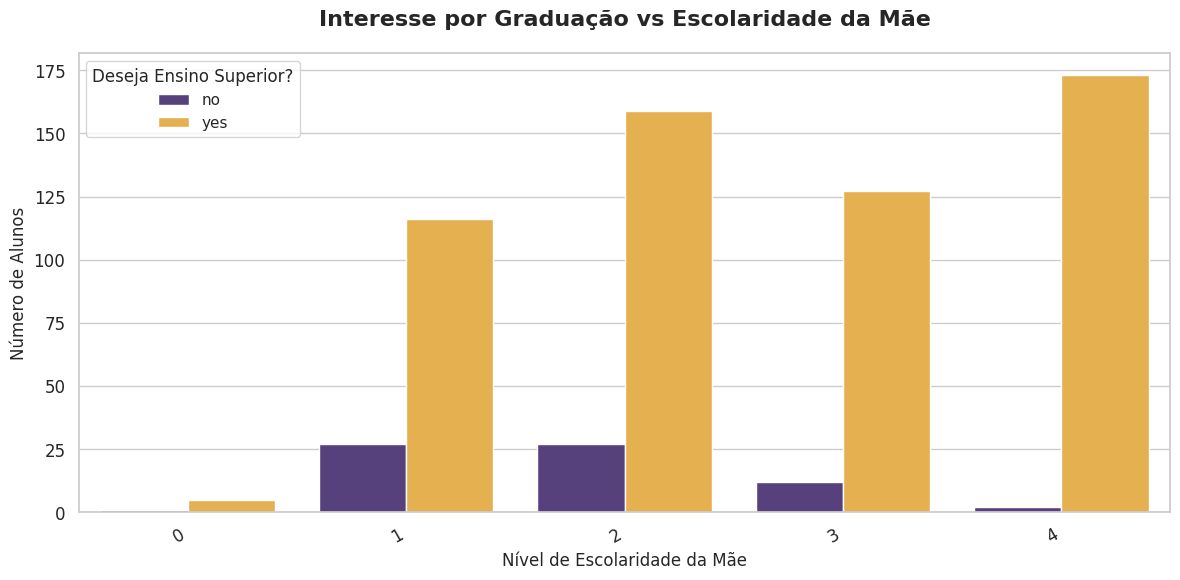

In [ ]:

sns.set(style="whitegrid", font_scale=1.1)
custom_palette = {"yes": "#feb737", "no": "#543787"}


plt.figure(figsize=(12, 6))

sns.countplot(x='Medu', hue='higher', data=df, palette=custom_palette, edgecolor='white')


plt.title('Interesse por Graduação vs Escolaridade da Mãe', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Nível de Escolaridade da Mãe', fontsize=12)
plt.ylabel('Número de Alunos', fontsize=12)
plt.legend(title='Deseja Ensino Superior?', title_fontsize=12, fontsize=11, loc='upper left')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


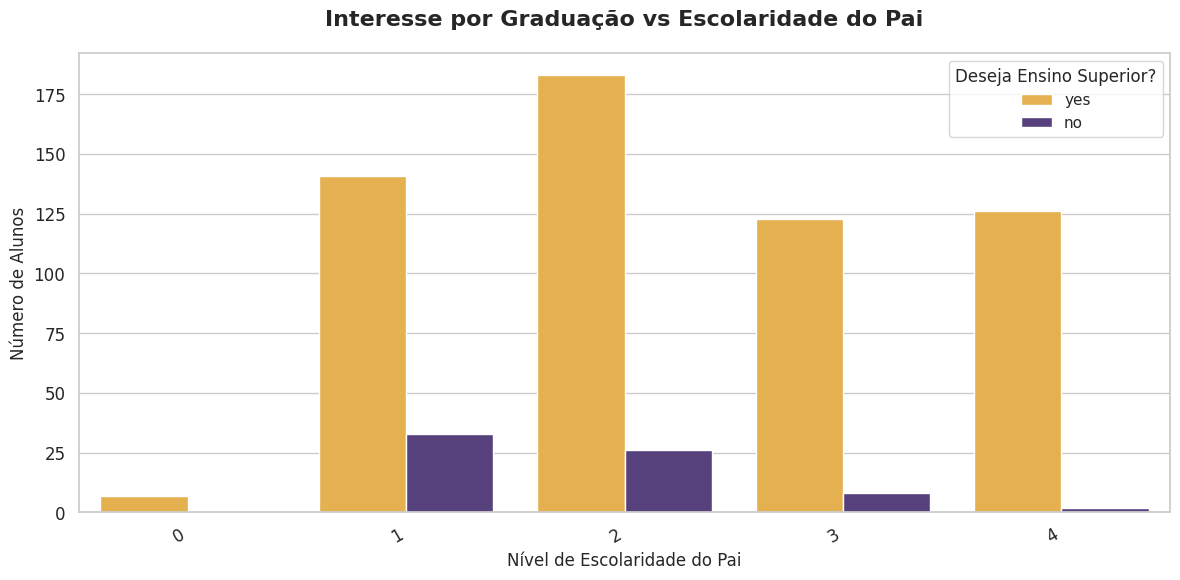

In [ ]:

sns.set(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(12, 6))

sns.countplot(x='Fedu', hue='higher', data=df, palette=custom_palette, edgecolor='white')


plt.title('Interesse por Graduação vs Escolaridade do Pai', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Nível de Escolaridade do Pai', fontsize=12)
plt.ylabel('Número de Alunos', fontsize=12)
plt.legend(title='Deseja Ensino Superior?', title_fontsize=12, fontsize=11, loc='upper right')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

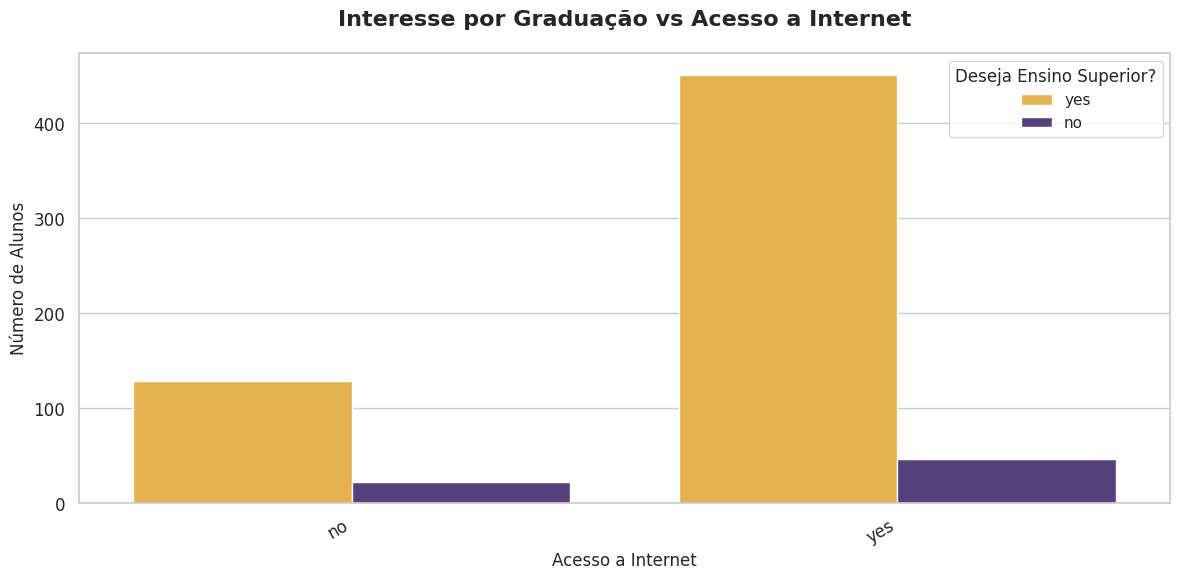

In [ ]:

sns.set(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(12, 6))

sns.countplot(x='internet', hue='higher', data=df, palette=custom_palette, edgecolor='white')


plt.title('Interesse por Graduação vs Acesso a Internet', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Acesso a Internet', fontsize=12)
plt.ylabel('Número de Alunos', fontsize=12)
plt.legend(title='Deseja Ensino Superior?', title_fontsize=12, fontsize=11, loc='upper right')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
df.columns

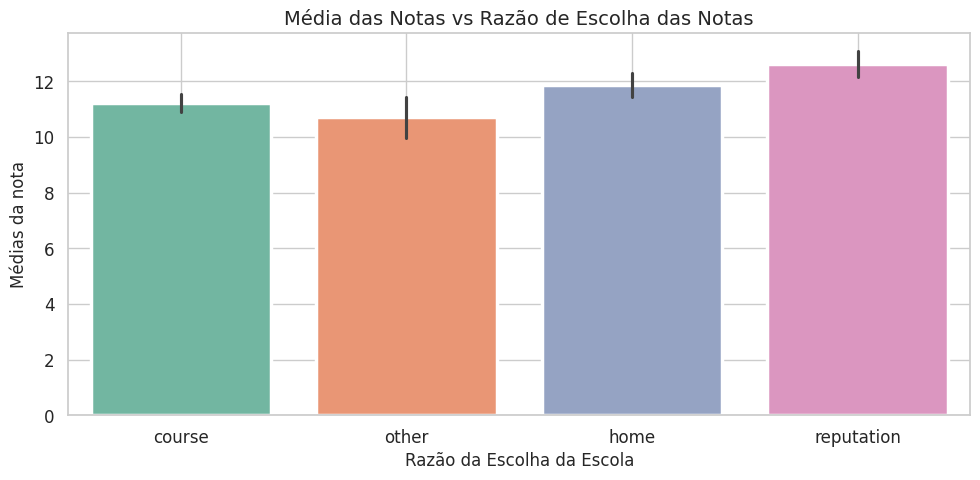

In [ ]:

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='reason', y='mean_grades', hue="reason", linewidth=2.5, palette='Set2')

plt.title('Média das Notas vs Razão de Escolha das Notas', fontsize=14)
plt.xlabel('Razão da Escolha da Escola', fontsize=12)
plt.ylabel('Médias da nota', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
higher_no = df[df['higher'] == 'no']
higher_yes = df[df['higher'] == 'yes']

cat_cols_no = higher_no.select_dtypes(exclude='number').columns
cat_cols_yes = higher_yes.select_dtypes(exclude='number').columns

/tmp/ipython-input-39-833699403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_yes)


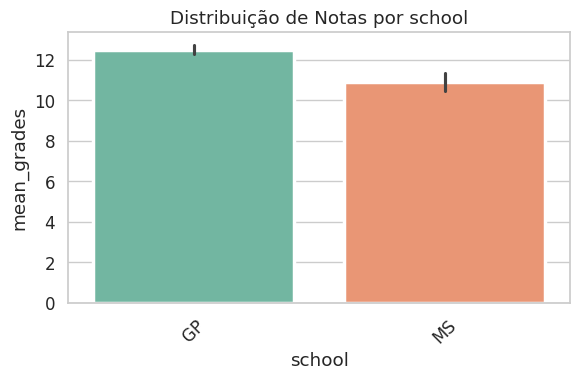

/tmp/ipython-input-39-833699403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_yes)


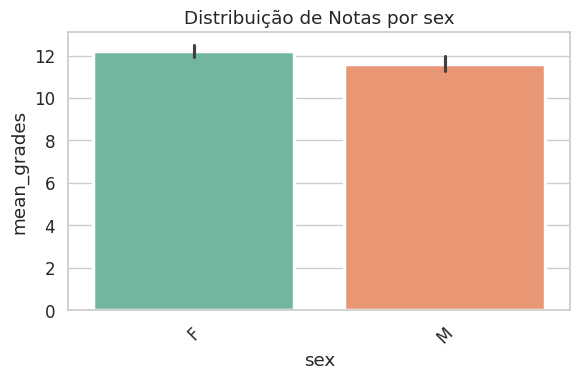

/tmp/ipython-input-39-833699403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_yes)


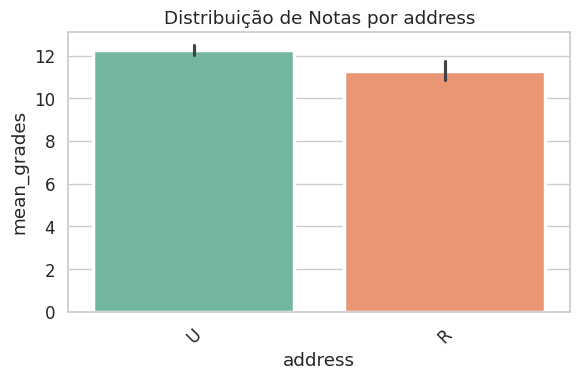

/tmp/ipython-input-39-833699403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_yes)


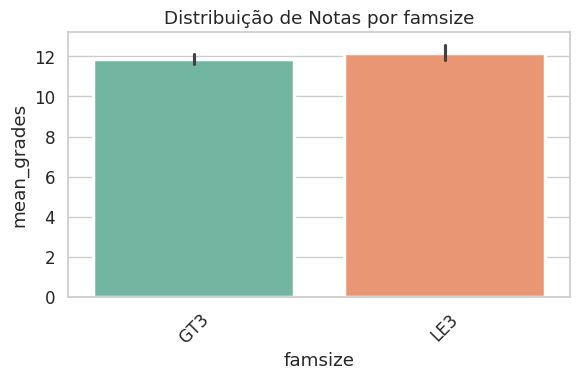

/tmp/ipython-input-39-833699403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_yes)


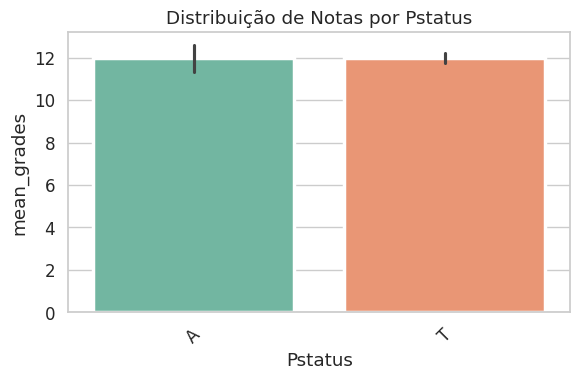

/tmp/ipython-input-39-833699403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_yes)


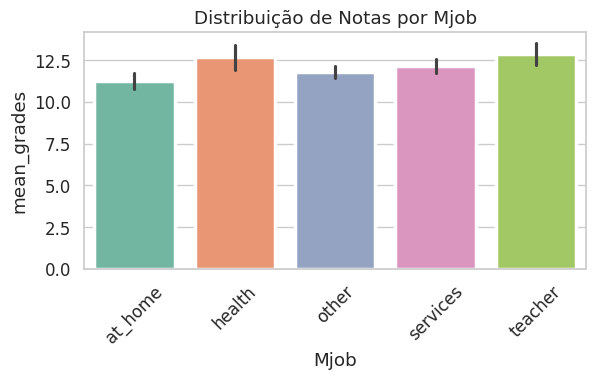

/tmp/ipython-input-39-833699403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_yes)


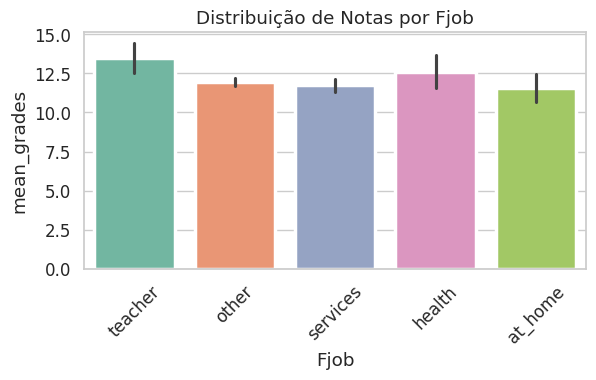

/tmp/ipython-input-39-833699403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_yes)


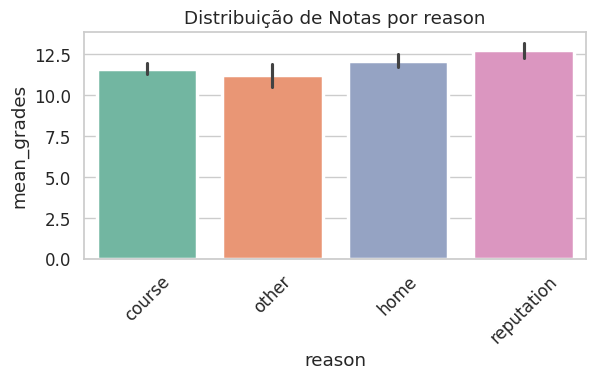

/tmp/ipython-input-39-833699403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_yes)


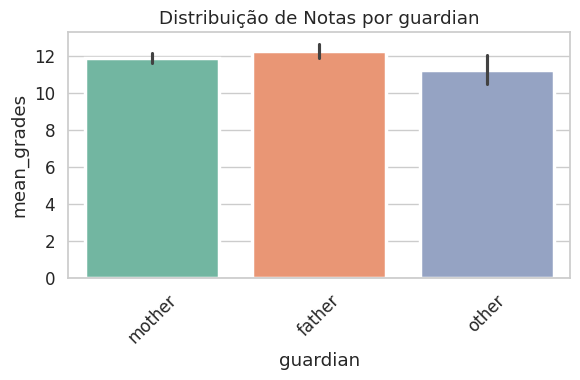

/tmp/ipython-input-39-833699403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_yes)


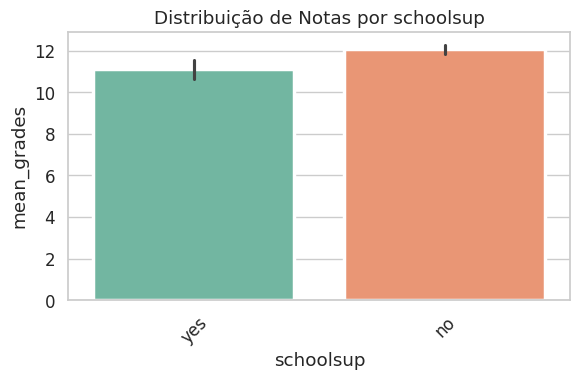

/tmp/ipython-input-39-833699403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_yes)


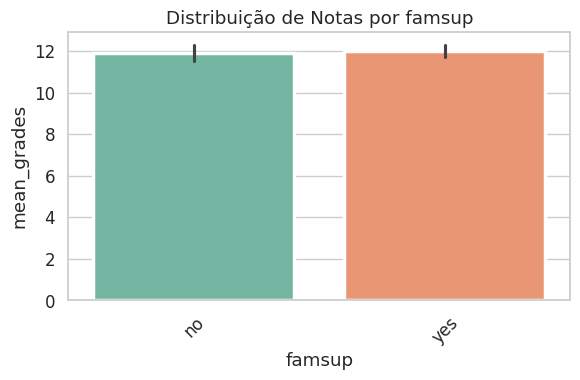

/tmp/ipython-input-39-833699403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_yes)


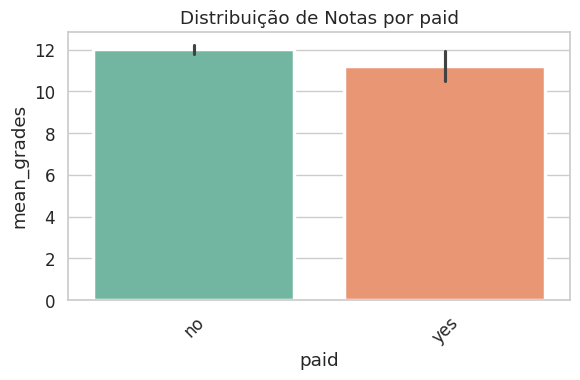

/tmp/ipython-input-39-833699403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_yes)


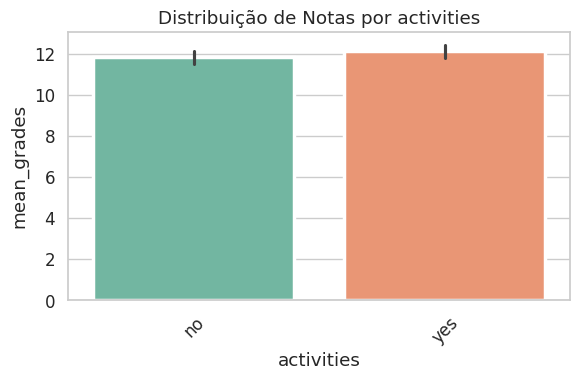

/tmp/ipython-input-39-833699403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_yes)


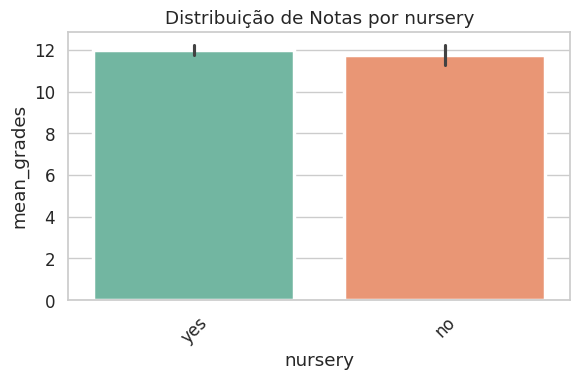

/tmp/ipython-input-39-833699403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_yes)


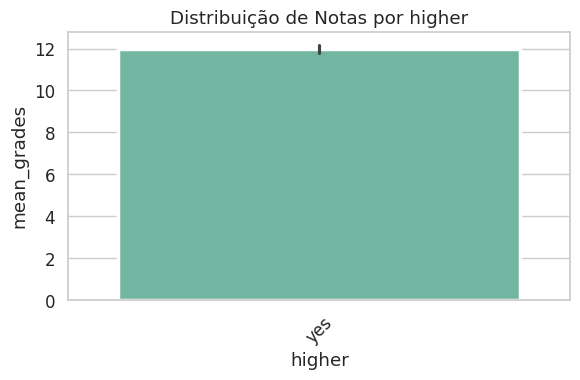

/tmp/ipython-input-39-833699403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_yes)


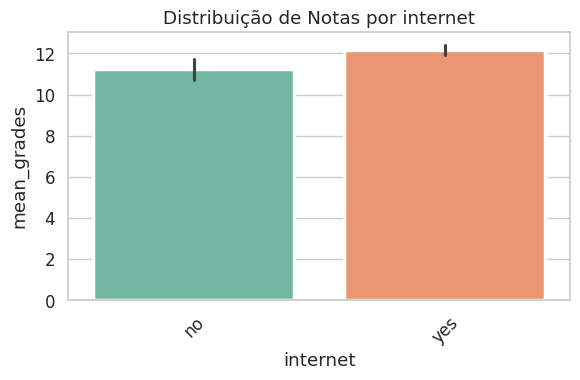

/tmp/ipython-input-39-833699403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_yes)


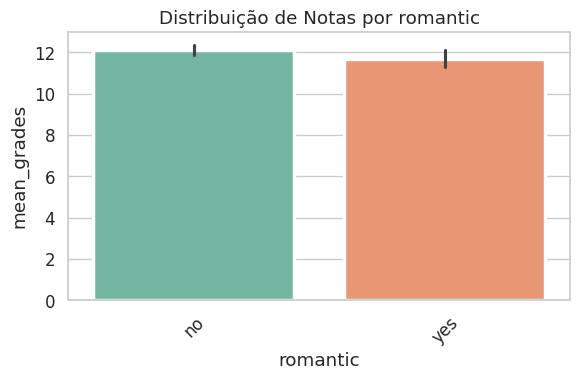

In [ ]:
# Categoricas - yes

for col in cat_cols_yes:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_yes)
    plt.title(f'Distribuição de Notas por {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-40-668306517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_no)


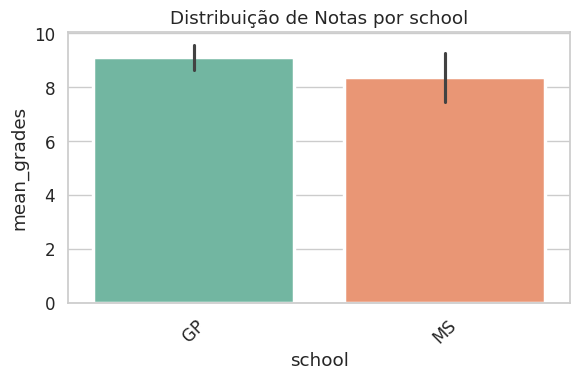

/tmp/ipython-input-40-668306517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_no)


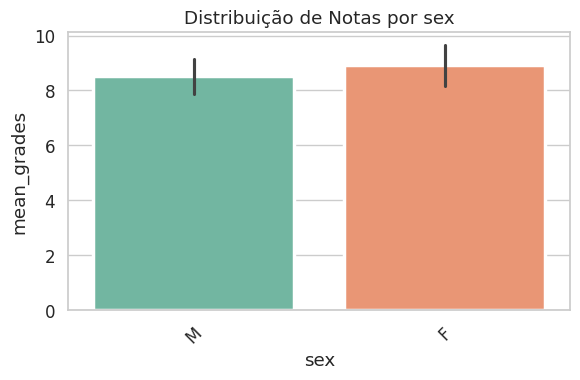

/tmp/ipython-input-40-668306517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_no)


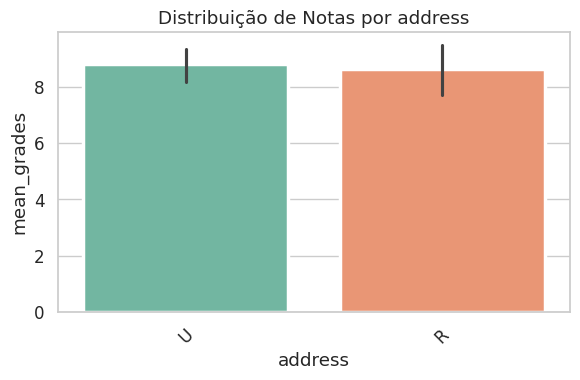

/tmp/ipython-input-40-668306517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_no)


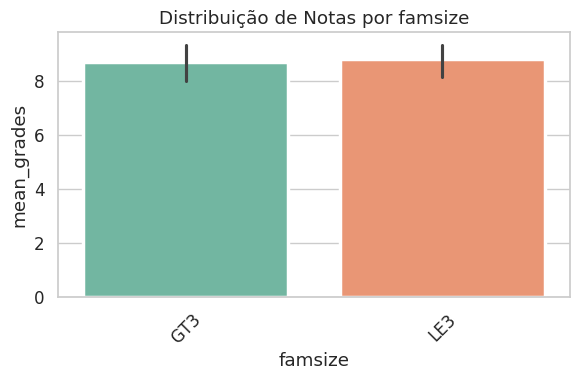

/tmp/ipython-input-40-668306517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_no)


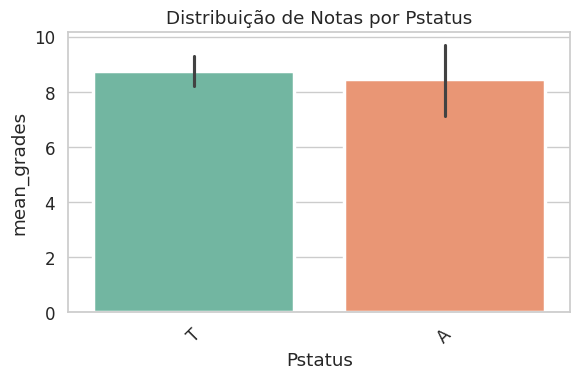

/tmp/ipython-input-40-668306517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_no)


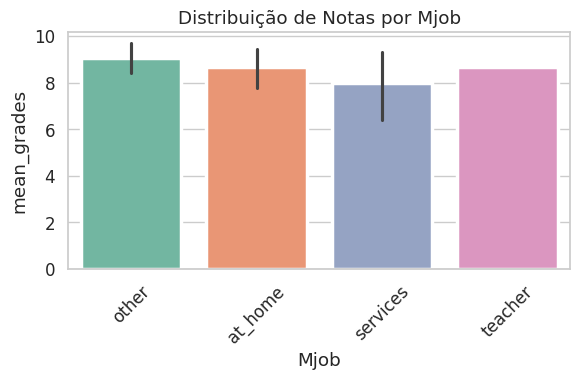

/tmp/ipython-input-40-668306517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_no)


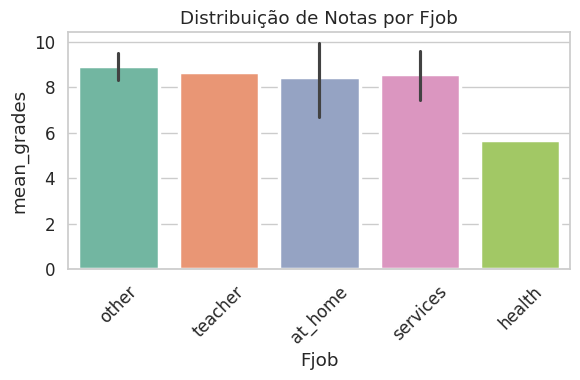

/tmp/ipython-input-40-668306517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_no)


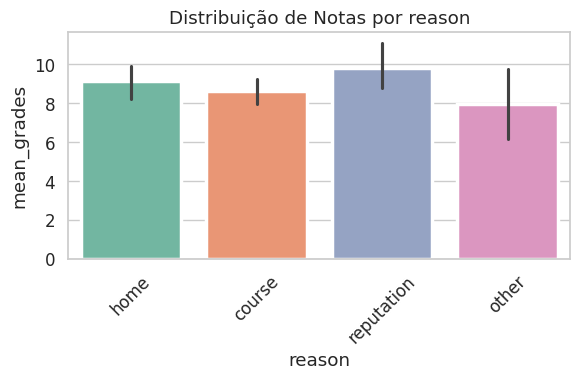

/tmp/ipython-input-40-668306517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_no)


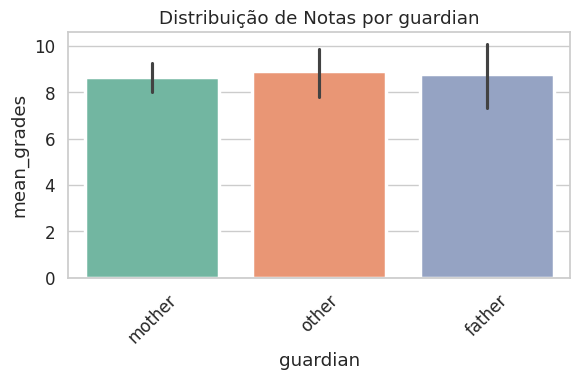

/tmp/ipython-input-40-668306517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_no)


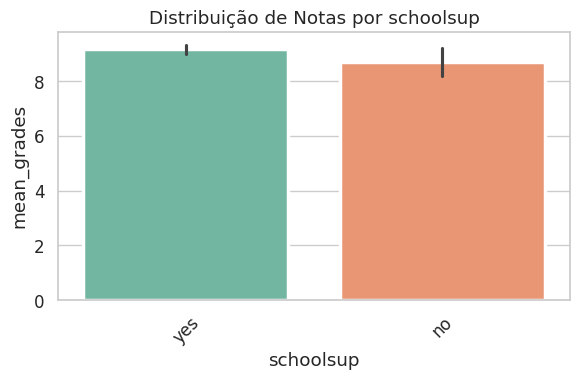

/tmp/ipython-input-40-668306517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_no)


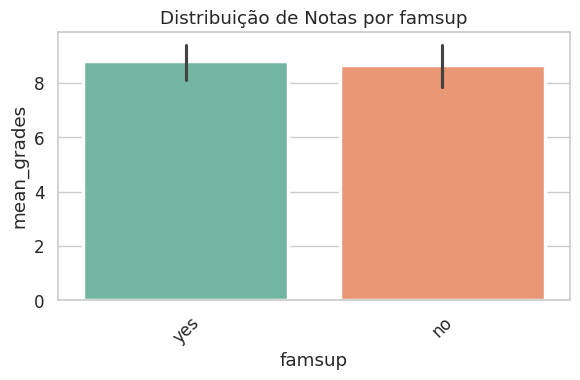

/tmp/ipython-input-40-668306517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_no)


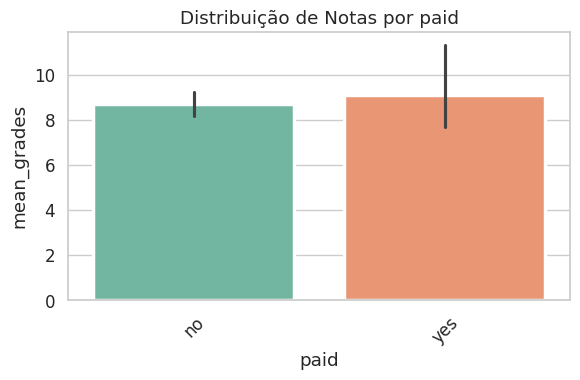

/tmp/ipython-input-40-668306517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_no)


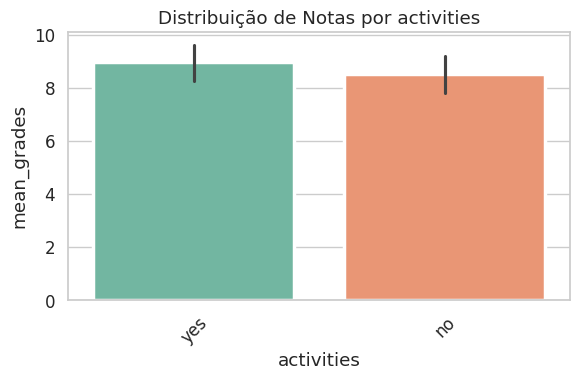

/tmp/ipython-input-40-668306517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_no)


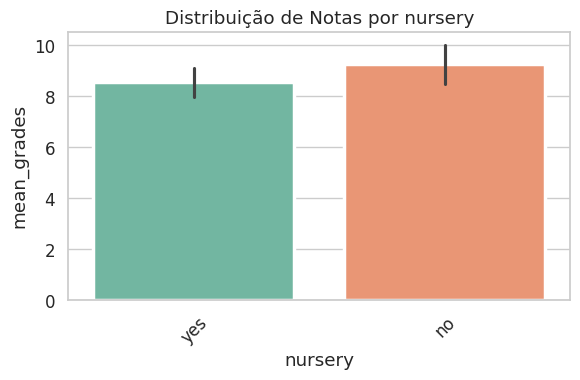

/tmp/ipython-input-40-668306517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_no)


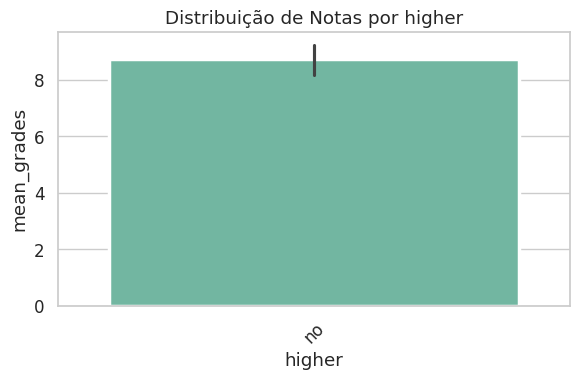

/tmp/ipython-input-40-668306517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_no)


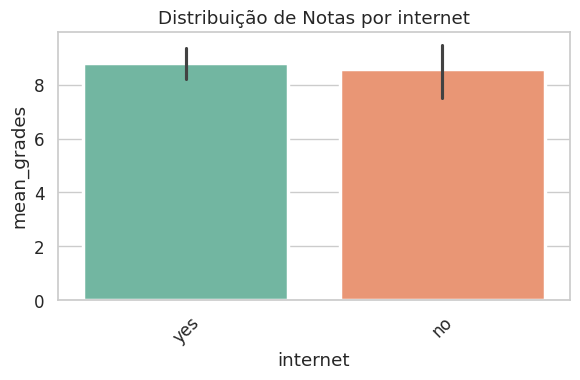

/tmp/ipython-input-40-668306517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_no)


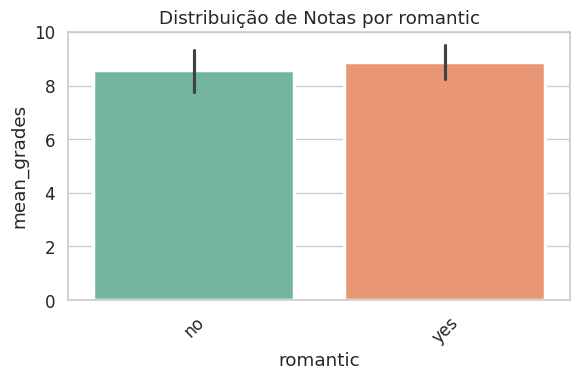

In [ ]:
# Categoricas - no

for col in cat_cols_no:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=col, y='mean_grades', linewidth=2.5, palette='Set2', data=higher_no)
    plt.title(f'Distribuição de Notas por {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()